# **PROJECT**
### 22KDL


<table width="100%" style="border:0px;">
    <tr style="font-size: 10pt">
        <td><b>Name:</b> Huỳnh Thảo Quỳnh</td>
        <td><b>MSSV:</b> 22280075</td>
    </tr>
</table>


**HYPOTHESIS**: Analyze the factors affecting the total number of product sales..

**Data collection**
- Lazada: thu thập nhiều danh mục dữ liệu để đảm bảo tính đa dạng và không thiên vị.
   * thời trang: quần áo, giày dép, trang sức
   * điện tử: điện thoại, laptop, tivi
- Features cần thu thập:
  * **Type**:     danh mục
  * **Title**:    tên sản phẩm
  * **Link**
  * **Price_sale**: giá sau khi được giảm giá
  * **Sale_off**: phần trăm giảm giá
  * **Total_sold**: tổng số lượt mua
  * **Preview**: tổng số lượt đánh giá
  * **Location**: địa điểm
  * **Price_original**: giá ban đầu
  * **Ship_price**: tiền ship
  * **Return**: chính sách trả hàng
  * **Sale_rating**: phần trăm đơn hàng được đánh giá tích cực
  * **Ship_on_time**: phần trăm đơn hàng được ship đúng thời gian
  * **Chat_response**: phần trăm khả năng phản hồi của người bán
  * **One_star**: tổng số lượt đánh giá 1 sao
  * **Two_star**: tổng số lượt đánh giá 2 sao
  * **Three_star**: tổng số lượt đánh giá 3 sao
  * **Four_star**: tổng số lượt đánh giá 4 sao
  * **Five_star**: tổng số lượt đánh giá 5 sao



### **I/ Crawl data from the web (text, HTML) that is relevant to your hypothesis.**



#### **Khai báo thư viện cần dùng:**



In [42]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup # Dùng để phân tích cú pháp của HTML.
from selenium import webdriver # Một công cụ để tự động hóa trình duyệt web.
import urllib.request # Dùng để mở và đọc URL, nó hỗ trợ các giao thức như HTTP, HTTPS,...
from selenium.webdriver.chrome.options import Options
# Là một lớp dùng để đặt các tùy chọn cho trình duyệt Chrome khi khởi chạy nó thông qua selenium.
from selenium.webdriver.chrome.service import Service
# Là một lớp dùng để quản lý dịch vụ ChromeDriver khi sử dụng với selenium
from time import sleep
import random
from selenium.webdriver.common.by import By
# Là một lớp trong selenium cung cấp các phương thức để định vị các phần tử trên trang web.
from selenium.common.exceptions import NoSuchElementException, ElementNotInteractableException
# Đây là các ngoại lệ trong selenium được sử dụng để xử lý các lỗi có thể xảy ra khi làm việc
# với các phần tử trên trang web. NoSuchElementException xuất hiện khi không tìm thấy phần tử
# và ElementNotInteractableException xuất hiện khi phần tử không thể tương tác.
from tqdm import tqdm


#### **Khởi tạo Selenium với ChromeDriver:**



In [ ]:
main_link = 'https://www.lazada.vn/catalog/?q=laptop'
path = 'chromedriver.exe'

# # Customize chrome displayLa
chrome_options = Options()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-notifications')
chrome_options.add_argument('--disable-infobars')

service = Service(executable_path=path)
driver = webdriver.Chrome(service=service, options=chrome_options)

driver.get(main_link)

#### **Cách lấy các Elemment trên trang web Lazada:**
- ##### **TH1: Sử dụng tên class**
  - B1: Nhấn Ctrl + Shift + c
  - B2: Di chuyển chuột đến vị trí Elemment cần lấy thông tin, nhấn chuột trái.
  - B3: Lấy tên của các class cần thiết để xác định được thông tin Elemmet.
- ##### **TH2: Sử dụng xpath**
  - B1: Nhấn Ctrl + Shift + c
  - B2: Di chuyển chuột đến vị trí Elemment cần lấy thông tin, nhấn chuột trái.
  - B3: Nhấn vào class chứa thông tin của Elemment.
  - B4: Nhấn chuột phải -> Copy -> Copy full xpath.

#### **Định nghĩa hàm đọc thông tin từ page chứa 40 sản phẩm:**

In [ ]:
def get_Data_On_Page():
    # Lấy thông tin về loại sản phẩm (Type)
    Type = [elem.get_attribute("value") for elem in driver.find_elements(By.CSS_SELECTOR, ".search-box__input--O34g")]

    # Lấy tiêu đề của sản phẩm (Title)
    Title = [elem.text for elem in driver.find_elements(By.CSS_SELECTOR, ".RfADt [href]")]

    # Lấy liên kết tới sản phẩm (Link)
    Link = [elem.get_attribute('href') for elem in driver.find_elements(By.CSS_SELECTOR, ".RfADt [href]")]

    # Lấy giá khuyến mãi của sản phẩm (Price_sale)
    Price_sale = [elem.text for elem in driver.find_elements(By.CSS_SELECTOR, ".ooOxS")]

    # Lấy thông tin giảm giá của sản phẩm (Sale_off)
    Sale_off = [elem.text for elem in driver.find_elements(By.CSS_SELECTOR , ".WNoq3")]

    # Khởi tạo danh sách để lưu thông tin số lượng đã bán và đánh giá của sản phẩm
    Total_sold, Preview = [], []

    # Vòng lặp để lấy thông tin số lượng đã bán và đánh giá của từng sản phẩm
    for i in range(1, len(Title)+1):
        try:
            one_total_sold = driver.find_element("xpath", "/html/body/div[3]/div/div[2]/div[1]/div/div[1]/div[2]/div[{}]/div/div/div[2]/div[5]/span[1]/span[1]".format(i))
            Total_sold.append(one_total_sold.text)
        except NoSuchElementException:
            Total_sold.append(None)

        try:
            one_preview = driver.find_element("xpath", "/html/body/div[3]/div/div[2]/div[1]/div/div[1]/div[2]/div[{}]/div/div/div[2]/div[5]/div/span".format(i))
            Preview.append(one_preview.text)
        except NoSuchElementException:
            Preview.append(None)

    # Lấy thông tin vị trí của sản phẩm (Location)
    Location = [elem.text for elem in driver.find_elements(By.CSS_SELECTOR, ".oa6ri")]

    # Nếu danh sách Type chỉ có một phần tử, nhân đôi nó lên bằng với số lượng Title
    if len(Type) == 1:
        Type = Type * len(Title)

    # Tạo một từ điển chứa tất cả các dữ liệu đã thu thập
    data = {
        "Type": Type,
        "Title": Title,
        "Link": Link,
        "Price_sale": Price_sale,
        "Sale_off": Sale_off,
        "Total_sold": Total_sold,
        "Preview": Preview,
        "Location": Location
    }

    # Chuyển từ điển dữ liệu thành DataFrame
    df = pd.DataFrame(data)
    return df


#### **Gọi hàm get_Data_On_Page()**

In [ ]:
# Gọi hàm và nhận DataFrame
df_Laptop = get_Data_On_Page()
# Đặt lại chỉ mục của DataFrame bắt đầu từ 1
df_Laptop.index = np.arange(1, len(df_Laptop) + 1)

df_Laptop.head()

,Type,Title,Link,Price_sale,Sale_off,Total_sold,Preview,Location
1,laptop,"Máy Tính Xách Tay Bàn Phím Bao Gồm, Màng Bảo V...",https://www.lazada.vn/products/may-tinh-xach-t...,39.000 ₫,17% Off,315 Đã bán,(68),Hồ Chí Minh
2,laptop,laptop toshiba z35 cực mạnh - i5 6200U U Ram 1...,https://www.lazada.vn/products/laptop-toshiba-...,2.706.000 ₫,9% Off,34 Đã bán,(7),Quảng Trị
3,laptop,"Laptop NEC PM750N Core i7-8565U, 16gb ram, 512...",https://www.lazada.vn/products/laptop-nec-pm75...,6.000.000 ₫,,None,(1),Hưng Yên
4,laptop,Laptop mini hàng đẹp,https://www.lazada.vn/products/laptop-mini-han...,902.899 ₫,25% Off,17 Đã bán,(5),Hưng Yên
5,laptop,Laptop cũ nhiều lựa chọn Pentium đến i3 i5 i7 ...,https://www.lazada.vn/products/laptop-cu-nhieu...,1.000.000 ₫,,84 Đã bán,(30),Hà Nội


#### **Định nghĩa hàm đọc thông tin của một sản phẩm sau khi truy cập vào link sản phẩm:**

In [ ]:
def get_Data_OneProduct_Link(link):
    driver.get(link)                            # Truy cập vào link của sản phẩm
    sleep(random.uniform(3, 5))                 # Ngủ ngẫu nhiên từ 3 đến 5 giây để mô phỏng hành vi người dùng và tránh bị chặn

    # Lấy giá gốc của sản phẩm (Price_original)
    Price_original = [elem.text for elem in driver.find_elements(By.CSS_SELECTOR, ".notranslate.pdp-price.pdp-price_type_deleted.pdp-price_color_lightgray.pdp-price_size_xs")]

    # Lấy phí vận chuyển (Ship_price)
    Ship_price = [elem.text for elem in driver.find_elements(By.CSS_SELECTOR, ".delivery-option-item.delivery-option-item_type_standard .delivery-option-item__body .delivery-option-item__shipping-fee.no-subtitle")]

    # Lấy chính sách hoàn trả (Return)
    Return = [elem.text for elem in driver.find_elements(By.CSS_SELECTOR, ".delivery-option-item.delivery-option-item_type_returnPolicy30 .delivery-option-item__body .delivery-option-item__info .delivery-option-item__title")]

    # Lấy đánh giá bán hàng, giao hàng đúng giờ và phản hồi chat (Sale_rating, Ship_on_time, Chat_response)
    percentage = [elem.text for elem in driver.find_elements(By.CSS_SELECTOR, ".seller-info-value ")]
    Sale_rating = percentage[0] if len(percentage) > 0 else None
    Ship_on_time = percentage[1] if len(percentage) > 1 else None
    Chat_response = percentage[2] if len(percentage) > 2 else None

    # Cuộn trang từ từ để tải phần đánh giá sao
    while True:
        driver.execute_script("window.scrollBy(0, 400);")
        sleep(1)  # Đợi một chút để nội dung tải
        try:
            stars = driver.find_elements(By.CSS_SELECTOR, ".detail .percent")
            if len(stars) >= 5:
                break
        except NoSuchElementException:
            continue

    # Khởi tạo danh sách để lưu thông tin đánh giá sao
    One_star, Two_star, Three_star, Four_star, Five_star = [], [], [], [], []
    stars = [elem.text for elem in stars]

    One_star.append(stars[4] if len(stars) > 4 else 'N/A')
    Two_star.append(stars[3] if len(stars) > 3 else 'N/A')
    Three_star.append(stars[2] if len(stars) > 2 else 'N/A')
    Four_star.append(stars[1] if len(stars) > 1 else 'N/A')
    Five_star.append(stars[0] if len(stars) > 0 else 'N/A')

    # Tạo từ điển chứa các thông tin đã thu thập
    One_Product = {
        "Price_original": Price_original[0] if Price_original else None,
        "Ship_price": Ship_price[0] if Ship_price else None,
        "Return": Return[0] if Return else None,
        "Sale_rating": Sale_rating,
        "Ship_on_time": Ship_on_time,
        "Chat_response": Chat_response,
        "One_star": One_star,
        "Two_star": Two_star,
        "Three_star": Three_star,
        "Four_star": Four_star,
        "Five_star": Five_star
    }

    return One_Product


#### **Gọi hàm get_Data_OneProduct_Link(link):**


In [ ]:
Products = {
    "Price_original": [],
    "Ship_price": [],
    "Return": [],
    "Sale_rating": [],
    "Ship_on_time": [],
    "Chat_response": [],
    "One_star": [],
    "Two_star": [],
    "Three_star": [],
    "Four_star": [],
    "Five_star": []
}

# Vòng lặp qua từng link sản phẩm  (chạy demo 5 sản phẩm đầu)
for link in tqdm(df_Laptop.Link[0:5], desc="Crawling link product"):
    LinkProduct = get_Data_OneProduct_Link(link)  # Gọi hàm để lấy dữ liệu của từng sản phẩm
    # Lưu trữ dữ liệu vào từ điển Products
    for key in Products.keys():
        Products[key].append(LinkProduct[key])

Crawling link product: 100%|██████████| 5/5 [02:27<00:00, 29.51s/it]


In [ ]:
demo = df_Laptop[0:5].copy()
for key, value in Products.items():
    demo[key] = value
demo

,Type,Title,Link,Price_sale,Sale_off,Total_sold,Preview,Location,Price_original,Ship_price,Return,Sale_rating,Ship_on_time,Chat_response,One_star,Two_star,Three_star,Four_star,Five_star
1,laptop,"Máy Tính Xách Tay Bàn Phím Bao Gồm, Màng Bảo V...",https://www.lazada.vn/products/may-tinh-xach-t...,39.000 ₫,17% Off,315 Đã bán,(68),Hồ Chí Minh,47.000 ₫,17.000 ₫,None,96%,97%,100%,[11],[1],[3],[5],[48]
2,laptop,laptop toshiba z35 cực mạnh - i5 6200U U Ram 1...,https://www.lazada.vn/products/laptop-toshiba-...,2.706.000 ₫,9% Off,34 Đã bán,(7),Quảng Trị,3.499.000 ₫,37.700 ₫,None,97%,100%,Không đủ thông tin,[0],[0],[0],[0],[7]
3,laptop,"Laptop NEC PM750N Core i7-8565U, 16gb ram, 512...",https://www.lazada.vn/products/laptop-nec-pm75...,6.000.000 ₫,,None,(1),Hưng Yên,None,56.800 ₫,None,91%,70%,100%,[0],[0],[0],[0],[1]
4,laptop,Laptop mini hàng đẹp,https://www.lazada.vn/products/laptop-mini-han...,902.899 ₫,25% Off,17 Đã bán,(5),Hưng Yên,1.499.999 ₫,70.000 ₫,None,83%,100%,92%,[3],[0],[0],[0],[2]
5,laptop,Laptop cũ nhiều lựa chọn Pentium đến i3 i5 i7 ...,https://www.lazada.vn/products/laptop-cu-nhieu...,1.000.000 ₫,,84 Đã bán,(30),Hà Nội,None,198.200 ₫,None,94%,28%,57%,[2],[1],[1],[4],[22]


Áp dụng hàm **get_Data_On_Page & get_Data_OneProduct_Link** cho các page của từng danh mục. Sau khi crawl và tổng hợp, sẽ có được file **Data_After_Crawl**

### **II/ Use a Large Language Model (LLM) to parse this unstructured data into features.**

**Trước khi sử dụng LLMs:**

Đầu tiên, với tập dữ liệu mà nhóm đã crawl:

In [ ]:
import pandas as pd

df = pd.read_csv("Crawl_Data_Final.csv")
df

,Type,Title,Link,Price_sale,Sale_off,Total_sold,Preview,Location,Price_original,Ship_price,Return,Sale_rating,Ship_on_time,Chat_response,One_star,Two_star,Three_star,Four_star,Five_star
0,quần áo,Đồ Bộ Nữ Đi Chơi Chất Thun Mát Size M - dưới 5...,https://www.lazada.vn/products/do-bo-nu-di-cho...,35.891 ₫,64% Off,3.0K Đã bán,(1022),Hồ Chí Minh,100.000 ₫,16.500 ₫,3 ngày trả hàng cho Nhà bán hàng,97%,100%,100%,20.0,7.0,27.0,36.0,932.0
1,quần áo,Đồ ngủ nữ pijama mặc nhà bộ ngủ hoạt hình cộc ...,https://www.lazada.vn/products/do-ngu-nu-pijam...,25.000 ₫,50% Off,907 Đã bán,(241),Hồ Chí Minh,71.998 ₫,16.500 ₫,3 ngày trả hàng cho Nhà bán hàng,91%,100%,50%,5.0,2.0,6.0,7.0,222.0
2,quần áo,[Đủ size 35-55 cân] Sét bộ 3 món áo 2 dây+áo c...,https://www.lazada.vn/products/du-size-35-55-c...,79.000 ₫,43% Off,961 Đã bán,(260),Hà Nội,139.000 ₫,32.700 ₫,3 ngày trả hàng cho Nhà bán hàng,92%,99%,33%,11.0,8.0,8.0,16.0,218.0
3,quần áo,SÉT BỘ ÁO CỘC TAY CÔ BÉ ĐI XE MÁY KÈM QUẦN BOM...,https://www.lazada.vn/products/set-bo-ao-coc-t...,36.000 ₫,60% Off,102 Đã bán,(21),Nam Định,189.000 ₫,37.700 ₫,3 ngày trả hàng cho Nhà bán hàng,94%,100%,83%,1.0,0.0,1.0,1.0,18.0
4,quần áo,"Bộ Pijama, Đồ Bộ Mặc Nhà Nữ Dáng Cộc xinh xắn",https://www.lazada.vn/products/bo-pijama-do-bo...,15.971 ₫,54% Off,219 Đã bán,(68),Hà Nội,59.000 ₫,32.700 ₫,3 ngày trả hàng cho Nhà bán hàng,95%,100%,100%,0.0,1.0,0.0,3.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,tivi,[6.6 HOTDEAL 4790K - Tặng Giá Treo TV DP243 ch...,https://www.lazada.vn/products/66-hotdeal-4790...,5.390.000 ₫,"LazFlash Sale,kết thúc sau 1 ngày",34 Đã bán,(9),Hồ Chí Minh,5.590.000 ₫,Miễn phí,30 Ngày Trả Hàng Miễn Phí,96%,100%,100%,['2'],['0'],['0'],['0'],['7']
7196,tivi,SMART TIVI DARLING 32 INCH 32HD964S ( Internet...,https://www.lazada.vn/products/smart-tivi-darl...,2.730.000 ₫,NaN,NaN,NaN,Hồ Chí Minh,NaN,38.000 ₫,NaN,Không đủ thông tin,Không đủ thông tin,Không đủ thông tin,['0'],['0'],['0'],['0'],['0']
7197,tivi,Google Tivi TCL 4K 43 inch 43P745 - Bảo hành 2...,https://www.lazada.vn/products/google-tivi-tcl...,6.150.000 ₫,NaN,NaN,NaN,Hồ Chí Minh,9.990.000 ₫,NaN,30 Ngày Trả Hàng Miễn Phí,97%,98%,89%,['0'],['0'],['0'],['0'],['0']
7198,tivi,Smart Tivi Casper 43 Inch 43FX5200 [Hàng Chính...,https://www.lazada.vn/products/smart-tivi-casp...,4.250.000 ₫,NaN,NaN,NaN,Hà Nội,4.990.000 ₫,135.500 ₫,NaN,100%,40%,Không đủ thông tin,['0'],['0'],['0'],['0'],['0']


Với tập dữ liệu trên, nhóm sẽ drop đi các cột không cần thiết cho mô hình là:

- Title: vì là dữ liệu dạng string và nhóm đã có cột Type để thể hiện đặc trưng của cột này.
- Link: link dẫn đến sản phẩm và không cần thiết cho mô hình

Kiểm tra số dữ liệu bị khuyết

In [ ]:
print(df.isnull().sum())

Type                 0
Title                0
Link                 0
Price_sale           0
Sale_off          1838
Total_sold        1846
Preview           1716
Location             0
Price_original    1408
Ship_price        1268
Return            3513
Sale_rating        145
Ship_on_time       141
Chat_response      141
One_star           212
Two_star           212
Three_star         212
Four_star          212
Five_star          212
dtype: int64


Cột Return có số dữ liệu bị khuyết lên đến 3513 nhiều hơn 50% tổng số quan sát nên nhóm sẽ bỏ đi cột này

In [ ]:
df.drop(['Title', 'Link', 'Return'], axis = 1, inplace = True)
df

,Type,Price_sale,Sale_off,Total_sold,Preview,Location,Price_original,Ship_price,Sale_rating,Ship_on_time,Chat_response,One_star,Two_star,Three_star,Four_star,Five_star
0,quần áo,35.891 ₫,64% Off,3.0K Đã bán,(1022),Hồ Chí Minh,100.000 ₫,16.500 ₫,97%,100%,100%,20.0,7.0,27.0,36.0,932.0
1,quần áo,25.000 ₫,50% Off,907 Đã bán,(241),Hồ Chí Minh,71.998 ₫,16.500 ₫,91%,100%,50%,5.0,2.0,6.0,7.0,222.0
2,quần áo,79.000 ₫,43% Off,961 Đã bán,(260),Hà Nội,139.000 ₫,32.700 ₫,92%,99%,33%,11.0,8.0,8.0,16.0,218.0
3,quần áo,36.000 ₫,60% Off,102 Đã bán,(21),Nam Định,189.000 ₫,37.700 ₫,94%,100%,83%,1.0,0.0,1.0,1.0,18.0
4,quần áo,15.971 ₫,54% Off,219 Đã bán,(68),Hà Nội,59.000 ₫,32.700 ₫,95%,100%,100%,0.0,1.0,0.0,3.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,tivi,5.390.000 ₫,"LazFlash Sale,kết thúc sau 1 ngày",34 Đã bán,(9),Hồ Chí Minh,5.590.000 ₫,Miễn phí,96%,100%,100%,['2'],['0'],['0'],['0'],['7']
7196,tivi,2.730.000 ₫,NaN,NaN,NaN,Hồ Chí Minh,NaN,38.000 ₫,Không đủ thông tin,Không đủ thông tin,Không đủ thông tin,['0'],['0'],['0'],['0'],['0']
7197,tivi,6.150.000 ₫,NaN,NaN,NaN,Hồ Chí Minh,9.990.000 ₫,NaN,97%,98%,89%,['0'],['0'],['0'],['0'],['0']
7198,tivi,4.250.000 ₫,NaN,NaN,NaN,Hà Nội,4.990.000 ₫,135.500 ₫,100%,40%,Không đủ thông tin,['0'],['0'],['0'],['0'],['0']


**Áp dụng LLMs:**

Tập dữ liệu nhóm thu thập được đã ở dạng có cấu trúc nên nhóm sẽ áp dụng LLMs cho việc xử lý các dữ liệu:
- Type và Location: giữ nguyên
- Price_sale, Price_original, Ship_price: lấy dạng số "35.891 ₫" -> "35891"
- Sale_off: chỉ lấy dạng số "64% Off" -> "64" các dạng khác đưa về "None"
- Total_sold: "3.0K Đã bán" -> 3000
- Preview: "(1022)" -> 1022
- Sale_rating, Ship_on_time, Chat_response: "100%" -> "100", các dạng khác đưa về "None"
- Star: đưa về số "['2']" -> 2

Nhóm sử dụng API của trang web: https://www.anyscale.com/ để áp dụng LLMs lên tập dữ liệu

In [ ]:
import os
import requests

s = requests.Session()

api_base = "https://api.endpoints.anyscale.com/v1"
# Replace with long-lived credentials for production
token = "esecret_exa36aaw8u5pqdsppk8dqxi5ij"
url = f"{api_base}/chat/completions"

In [ ]:
# Chat với bot
def call_api(formatted_data):
    body = {
    "model": "meta-llama/Meta-Llama-3-70B-Instruct",
    "messages": [
        {
        "role": "user",
        "content": "bạn là trợ lý ảo về AI và có nhiệm vụ chính là chuẩn hoá data một cách chính xác nhất"
        },
        {
        "role": "assistant",
        "content": "Nice to meet you! As a virtual assistant specializing in AI, my primary task is to ensure data standardization with utmost accuracy. I'm here to help you with data preprocessing, data cleaning, and data transformation to make your data reliable, consistent, and ready for analysis or modeling.\n\nTo achieve this, I'll employ various techniques, including:\n\n1. **Data Profiling**: I'll analyze your data to identify patterns, outliers, and inconsistencies, providing insights into data quality and potential issues.\n2. **Data Cleaning**: I'll correct errors, handle missing values, and remove duplicates to ensure data integrity and consistency.\n3. **Data Transformation**: I'll convert data types, perform aggregations, and apply business rules to transform your data into a standardized format.\n4. **Data Validation**: I'll check your data against a set of rules, constraints, and formats to ensure it meets the required standards.\n5. **Data Normalization**: I'll organize your data into a structured format, making it easier to analyze and model.\n\nMy expertise includes working with various data formats, such as CSV, JSON, XML, and databases like MySQL, PostgreSQL, and MongoDB. I'm also familiar with data standardization frameworks like ISO 11179 and Dublin Core.\n\nPlease provide me with more information about your data, such as:\n\n* What type of data do you have (e.g., customer information, transactional data, sensor readings)?\n* What is the current format of your data (e.g., CSV, JSON, database)?\n* What are the specific data quality issues you're experiencing (e.g., missing values, duplicates, inconsistencies)?\n* Are there any specific data standards or regulations you need to comply with (e.g., GDPR, HIPAA)?\n\nThe more information you provide, the better I can assist you in standardizing your data with accuracy and efficiency."
        },
        {
        "role": "user",
        "content": "Mỗi mục dữ liệu được ngăn cách bởi dấu |. Không bỏ bất kì 1 mục nào, không thêm bất kỳ mục nào, hãy chuẩn hóa thông tin về dạng số tương ứng, địa điểm giữ nguyên, nếu là giá trị None thì ghi là None. Ngăn cách các giá trị bằng dấu phẩy, không cần giải thích output, output bạn trả ra cho tôi có đúng 16 cột nhé: quần áo|35.891 ₫|64% Off|3.0K Đã bán|(1022)|Hồ Chí Minh|100.000 ₫|16.500 ₫|97%|100%|100%|20.0|7.0|27.0|36.0|932.0"
        },
        {
        "role": "assistant",
        "content": "Here is the standardized data with 16 columns, separated by commas:\n\nQuần áo,35891,64,3000,1022,Hồ Chí Minh,100000,16500,97,100,100,20,7,27,36,932"
        },
        {
        "role": "user",
        "content": "không viết hoa chữ đầu bạn phải trả về là: Here is the standardized output:\n\nquần áo,35891,64,3000,1022,Hồ Chí Minh,100000,16500,97,100,100,20,7,27,36,932"
        },
        {
        "role": "assistant",
        "content": "Here is the standardized output:\n\nquần áo,35891,64,3000,1022,Hồ Chí Minh,100000,16500,97,100,100,20,7,27,36,932"
        },
        {
        "role": "user",
        "content": f"{formatted_data}"
        }
    ],
    "temperature": 0,
    "max_tokens": 512,
    "top_p": 1,
    "frequency_penalty": 0
    }

    response = s.post(url, headers={"Authorization": f"Bearer {token}"}, json=body)
    return response.json()

In [ ]:
# Đưa 1 dòng dữ liệu vào đúng format để đưa vào LLMs
def format_row(row):
    return '|'.join(map(str, row.values))

In [ ]:
# Trước format
first_row = df.iloc[0]
first_row

Type                  quần áo
Price_sale           35.891 ₫
Sale_off              64% Off
Total_sold        3.0K Đã bán
Preview                (1022)
Location          Hồ Chí Minh
Price_original      100.000 ₫
Ship_price           16.500 ₫
Sale_rating               97%
Ship_on_time             100%
Chat_response            100%
One_star                 20.0
Two_star                  7.0
Three_star               27.0
Four_star                36.0
Five_star               932.0
Name: 0, dtype: object

In [ ]:
# Sau format
formatted_data = format_row(first_row)
formatted_data

'quần áo|35.891 ₫|64% Off|3.0K Đã bán|(1022)|Hồ Chí Minh|100.000 ₫|16.500 ₫|97%|100%|100%|20.0|7.0|27.0|36.0|932.0'

In [ ]:
api_response = call_api(formatted_data) # Gọi API của anyscale
# Lọc câu trả lời của LLM để lấy đầu ra
cleaned_data = api_response['choices'][0]['message']['content'].strip()
cleaned_data = cleaned_data.replace('Here is the standardized output:\n\n', '')
cleaned_data

'quần áo,35891,64,3000,1022,Hồ Chí Minh,100000,16500,97,100,100,20,7,27,36,932'

Sau khi áp dụng LLMs cho cả tập dữ liệu, nhóm được tập dữ liệu đã được xử lý đồng thời loại bỏ hàng dữ liệu không hợp lệ khi qua LLMs

In [ ]:
df = pd.read_csv("Final_Data_LLM.csv")
df

,Type,Price_sale,Sale_off,Total_sold,Preview,Location,Price_original,Ship_price,Sale_rating,Ship_on_time,Chat_response,One_star,Two_star,Three_star,Four_star,Five_star
0,quần áo,35891,64.0,3000.0,1022.0,Hồ Chí Minh,100000.0,16500.0,97.0,100.0,100.0,20.0,7.0,27.0,36.0,932.0
1,quần áo,25000,50.0,907.0,241.0,Hồ Chí Minh,71998.0,16500.0,91.0,100.0,50.0,5.0,2.0,6.0,7.0,222.0
2,quần áo,79000,43.0,961.0,260.0,Hà Nội,139000.0,32700.0,92.0,99.0,33.0,11.0,8.0,8.0,16.0,218.0
3,quần áo,36000,60.0,102.0,21.0,Nam Định,189000.0,37700.0,94.0,100.0,83.0,1.0,0.0,1.0,1.0,18.0
4,quần áo,15971,54.0,219.0,68.0,Hà Nội,59000.0,32700.0,95.0,100.0,100.0,0.0,1.0,0.0,3.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,tivi,7990000,NaN,20.0,8,Binh Duong,NaN,NaN,96,100.0,100.0,0.0,0.0,0.0,0.0,9.0
7148,tivi,2730000,NaN,NaN,NaN,Ho Chi Minh,NaN,38000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
7149,tivi,6150000,NaN,NaN,NaN,Ho Chi Minh,9990000.0,NaN,97,98.0,89.0,0.0,0.0,0.0,0.0,0.0
7150,tivi,4250000,NaN,NaN,NaN,Ha Noi,4990000.0,135500.0,100,40.0,NaN,0.0,0.0,0.0,0.0,0.0


### **III/ Apply causal inference techniques to test your hypothesis.**

#### 3.1 Handling missing values

In [43]:
from unidecode import unidecode

data = pd.read_csv("Data_After_LLM.csv")
data.head(3)

,Type,Price_sale,Sale_off,Total_sold,Preview,Location,Price_original,Ship_price,Sale_rating,Ship_on_time,Chat_response,One_star,Two_star,Three_star,Four_star,Five_star
0,quần áo,35891,64.0,3000.0,1022.0,Hồ Chí Minh,100000.0,16500.0,97.0,100.0,100.0,20.0,7.0,27.0,36.0,932.0
1,quần áo,25000,50.0,907.0,241.0,Hồ Chí Minh,71998.0,16500.0,91.0,100.0,50.0,5.0,2.0,6.0,7.0,222.0
2,quần áo,79000,43.0,961.0,260.0,Hà Nội,139000.0,32700.0,92.0,99.0,33.0,11.0,8.0,8.0,16.0,218.0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7152 entries, 0 to 7151
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            7152 non-null   object 
 1   Price_sale      7152 non-null   int64  
 2   Sale_off        5306 non-null   object 
 3   Total_sold      5312 non-null   object 
 4   Preview         5435 non-null   object 
 5   Location        7152 non-null   object 
 6   Price_original  5755 non-null   float64
 7   Ship_price      5905 non-null   object 
 8   Sale_rating     6489 non-null   object 
 9   Ship_on_time    5398 non-null   float64
 10  Chat_response   6060 non-null   object 
 11  One_star        7152 non-null   float64
 12  Two_star        7152 non-null   float64
 13  Three_star      7152 non-null   float64
 14  Four_star       7152 non-null   float64
 15  Five_star       6887 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 894.1+ KB


In [45]:
data.isnull().sum().sort_values(ascending=False)

Sale_off          1846
Total_sold        1840
Ship_on_time      1754
Preview           1717
Price_original    1397
Ship_price        1247
Chat_response     1092
Sale_rating        663
Five_star          265
Type                 0
Price_sale           0
Location             0
One_star             0
Two_star             0
Three_star           0
Four_star            0
dtype: int64

**Type & Location**

In [46]:
#Chuyển các cột Type và Location thành không dấu
print(data['Type'].unique(), "\n")
print(data['Location'].unique(), "\n")

['quần áo' 'giày dép' 'Trang sức' 'Trang suc' 'dien thoai' 'laptop' 'tivi'] 

['Hồ Chí Minh' 'Hà Nội' 'Nam Định' 'Nước ngoài' 'Tiền Giang' 'Cần Thơ'
 'Hà Nam' 'Trà Vinh' 'Thanh Hóa' 'Hưng Yên' 'Long An' 'Bến Tre' 'Phú Thọ'
 'Lâm Đồng' 'Đồng Nai' 'Hải Dương' 'Cà Mau' 'Bắc Giang' 'Quảng Ngãi'
 'Tây Ninh' 'Bình Định' 'Phú Yên' 'Bình Dương' 'Bắc Ninh' 'Đà Nẵng'
 'Vĩnh Phúc' 'Ho Chi Minh' 'Ha Noi' 'Hai Duong' 'Nghệ An' 'Binh Duong'
 'Hung Yen' 'Hai Phong' 'Da Nang' 'An Giang' 'Bac Ninh' 'Ben Tre'
 'Vinh Phuc' 'Nam Dinh' 'Tien Giang' 'Dak Nong' 'Thai Binh' 'Dak Lak'
 'Hanoi' 'Dong Nai' 'Thai Nguyen' 'Quang Tri' 'Thanh Hoa' 'Tay Ninh'
 'Nuoc Ngoai' 'Phu Tho' 'Nuoc ngai' 'Thua Thien Hue' 'Thái Bình'
 'Dong Thap' 'Ha Tinh' 'Phu Yen' 'Ba Ria Vung Tau' 'Bac Giang' 'Vinh Long'
 'Quang Nam'] 



In [47]:
#Chuyển cột Type
data['Type'].replace(['quần áo'], 'quan ao', inplace=True)
data['Type'].replace(['giày dép'], 'giay dep', inplace=True)
data['Type'].replace(['Trang sức', 'Trang suc'], 'trang suc', inplace=True)

In [48]:
#Hàm chuyển đổi thành không dấu
def remove_diacritics(text):
    return unidecode(text)

data['Location'] = data['Location'].apply(remove_diacritics)
data['Location'].unique()

array(['Ho Chi Minh', 'Ha Noi', 'Nam Dinh', 'Nuoc ngoai', 'Tien Giang',
       'Can Tho', 'Ha Nam', 'Tra Vinh', 'Thanh Hoa', 'Hung Yen',
       'Long An', 'Ben Tre', 'Phu Tho', 'Lam Dong', 'Dong Nai',
       'Hai Duong', 'Ca Mau', 'Bac Giang', 'Quang Ngai', 'Tay Ninh',
       'Binh Dinh', 'Phu Yen', 'Binh Duong', 'Bac Ninh', 'Da Nang',
       'Vinh Phuc', 'Nghe An', 'Hai Phong', 'An Giang', 'Dak Nong',
       'Thai Binh', 'Dak Lak', 'Hanoi', 'Thai Nguyen', 'Quang Tri',
       'Nuoc Ngoai', 'Nuoc ngai', 'Thua Thien Hue', 'Dong Thap',
       'Ha Tinh', 'Ba Ria Vung Tau', 'Vinh Long', 'Quang Nam'],
      dtype=object)

**Price_Sale & Sale_off & Price_original**

In [49]:
print(data['Sale_off'].unique())

['64.0' '50.0' '43.0' '60.0' '54.0' '67.0' nan '61.0' '66.0' '53.0' '47.0'
 '45.0' '57.0' '52.0' '49.0' '44.0' '30.0' '29.0' '56.0' '59.0' '8.0'
 '35.0' '58.0' '31.0' '12.0' '51.0' '21.0' '81.0' '41.0' '96.0' '39.0'
 '40.0' '46.0' '48.0' '33.0' '15.0' '42.0' '13.0' '79.0' '76.0' '24.0'
 '7.0' '23.0' '62.0' '65.0' '32.0' '55.0' '14.0' '26.0' '70.0' '37.0'
 '82.0' '83.0' '69.0' '63.0' '34.0' '94.0' '71.0' '73.0' '18.0' '77.0'
 '16.0' '72.0' '36.0' '86.0' '85.0' '78.0' '84.0' '28.0' '38.0' '25.0'
 '97.0' '20.0' '68.0' '17.0' '89.0' '88.0' '1.0' '75.0' '74.0' '22.0'
 '80.0' '92.0' '27.0' '5.0' '10.0' '11.0' '100.0' '6.0' '19.0' '9.0'
 '99.0' '98.0' '93.0' '7' '10' '16' '6' '15' '11' '12' '17' '8' '13' '27'
 '22' '29' '18' '9' '14' '31' '42' '35' '34' '25' '20' '26' '23' '19' '52'
 '21' '1' '24' '60' '5' '32' '3' '37' '40' '46' '28' '30' '45' '36' '38'
 '33' '41' '39' '2' '4' '1200' 'none' '0' '3.0' '4.0' '2.0' '1.1' '0.0']


In [50]:
data['Sale_off'] = data['Sale_off'].replace("none", None)

#Chuyển đổi float cho Sale_off & Price_sale
data['Sale_off'] = data['Sale_off'].astype(float)
data['Price_sale'] = data['Price_sale'].astype(float)

#Check null cho cột Sale_off
data['Sale_off'].isnull().sum()

1848

In [51]:
# Xoá dữ liệu cột Sale_off >= 100
indices_to_drop = data.loc[data['Sale_off'] >= 100].index
print(indices_to_drop)
data = data.drop(indices_to_drop)

Index([2040, 4158], dtype='int64')


In [52]:
# Tính toán giá trị vào NaN
#TH1: Price_original == NULL, Sale_off != NULL
data['Price_original'].fillna(data['Price_sale'] / (1 - data['Sale_off'] / 100), inplace=True)

#TH2: Sale_off == NULL,  Price_original != NULL
data['Sale_off'].fillna(((data['Price_original'] - data['Price_sale']) / data['Price_original']) * 100, inplace=True)

#TH3: Sale_off & Price_original == NULL
data['Sale_off'].fillna(0, inplace=True)
data['Price_original'].fillna(data['Price_sale'], inplace=True)

In [53]:
# Xoá hàng giá gốc < giá sale
data = data[data['Price_original'] >= data['Price_sale']]
data.head()

,Type,Price_sale,Sale_off,Total_sold,Preview,Location,Price_original,Ship_price,Sale_rating,Ship_on_time,Chat_response,One_star,Two_star,Three_star,Four_star,Five_star
0,quan ao,35891.0,64.0,3000.0,1022.0,Ho Chi Minh,100000.0,16500.0,97.0,100.0,100.0,20.0,7.0,27.0,36.0,932.0
1,quan ao,25000.0,50.0,907.0,241.0,Ho Chi Minh,71998.0,16500.0,91.0,100.0,50.0,5.0,2.0,6.0,7.0,222.0
2,quan ao,79000.0,43.0,961.0,260.0,Ha Noi,139000.0,32700.0,92.0,99.0,33.0,11.0,8.0,8.0,16.0,218.0
3,quan ao,36000.0,60.0,102.0,21.0,Nam Dinh,189000.0,37700.0,94.0,100.0,83.0,1.0,0.0,1.0,1.0,18.0
4,quan ao,15971.0,54.0,219.0,68.0,Ha Noi,59000.0,32700.0,95.0,100.0,100.0,0.0,1.0,0.0,3.0,65.0


**Total_sold & Preview & Ship_price & Sale_rating & Ship_on_time & Chat_response**

In [54]:
#Gán 0 cho 'Total_sold', 'Preview'
data['Total_sold'] = pd.to_numeric(data['Total_sold'], errors='coerce').fillna(0).astype(float)
data['Preview'] = pd.to_numeric(data["Preview"], errors='coerce').fillna(0).astype(float)

In [55]:
#Ship_price
data['Ship_price'] = pd.to_numeric(data['Ship_price'], errors='coerce').fillna(0).astype(int)
data['Ship_price'].unique()

array([   16500,    32700,    37700,    18300,        0,    17000,
          28700,    38000,    51100,    27000,    32200,    15500,
          45100,    44100,    19600,    43900,    23500,    27300,
          12200,      700,     8000,    20300,    57700,     7300,
           6000,    20100,    22700,    21500,    56800,    51500,
          20700,    40100,    23900,    40300,   635900,    21700,
           5500,   202600,   110800,    19000,  1928000,    26100,
          13700,    64800,    73600,    10200,      100,       98,
          84600,   198200,   744000,    21200,    65500,     9700,
          23800,    70000,    52400,    80200,   104900,       97,
          74400,     1200,    74700,       95,   100600,   118500,
          55400,    12800,    48200,    90700,    63300,    52300,
          90400,    34100,    64700,    13800,   494000,    63400,
        2695100,    16300,       90,    62600,   115100,     9100,
          90600,    63700,    30900,    94800,    32500,      

In [56]:
#Ship_on_time: chuyển sang int rồi fill NaN = median
data['Ship_on_time'] = pd.to_numeric(data['Ship_on_time'], errors='coerce').fillna(0).astype(int)
median_Ship_on_time = data['Ship_on_time'].median()
data['Ship_on_time'] = data['Ship_on_time'].replace([0], int(median_Ship_on_time))

data['Ship_on_time'].unique()

array([100,  99,  96,  97,  98,  93,  91,  87,  84,  92,  95,  83,  80,
        63,  86,  67,  28,  82,  85,  94,  60,  88,   3,  79,  89,  74,
        33,  90,  41,  81,  76,  29,  71,  66,  25,  13,  50,  72,  75,
        44,  70,  68,  57,  55,  78,  14,  20,  37,  65,  77,  40])

In [57]:
#Sale_rating: chuyển sang int rồi fill NaN = median
data['Sale_rating'] = pd.to_numeric(data['Sale_rating'], errors='coerce').fillna(0).astype(int)
median_Sale_rating = data['Sale_rating'].median()
data['Sale_rating'] = data['Sale_rating'].replace([0], int(median_Sale_rating))

data['Sale_rating'].unique()

array([ 97,  91,  92,  94,  95,  99,  88,  98,  93,  96,  86,  85,  69,
        90,  87,  89,  83,  62,  64,  84, 100,  78,  66,  68,  65,  77,
        76,  71,  74,  75,  73,  81,  60,  80,  40,  79,  82,  67])

In [58]:
#Chat_respone: chuyển sang int rồi fill NaN = median
data['Chat_response'] = pd.to_numeric(data['Chat_response'], errors='coerce').fillna(0).astype(int)
median_Chat_response = data['Chat_response'].median()
data['Chat_response'] = data['Chat_response'].replace([0], int(median_Chat_response))

data['Chat_response'].unique()

array([100,  50,  33,  83,  97,  60,  66,  90,  81,  98,  99,  54,  42,
        91,  82,  96,  34,  69,  64,  80,  58,  94,  87,  85,  57,  86,
        75,  63,  79,  71,  88,  92,  56,  77,  84,  93,  95,  72,  46,
        73,  78,  44,  76,  40,  70,  62,  53,  36,   6,  13,  89,  37,
         1,  55,  65,  52])

In [59]:
#Loại bỏ những dòng có Ship_price > 1000000
ship_to_drop = data.loc[data['Ship_price'] >= 1000000].index
print(ship_to_drop)

data = data.drop(ship_to_drop)

Index([3711, 3977, 4035, 4099, 4747, 5133, 5920, 5960, 6305, 6341, 6507, 6537, 6740, 6748, 6902, 6912, 7124, 7132, 7137], dtype='int64')


**Five_star**

In [60]:
#Loại bỏ những giá trị Null của cột Five_star
data = data.dropna(subset=['Five_star'])

**Drop duplicates**

In [61]:
#Check duplicated data
data.duplicated().sum()

2512

In [62]:
#Drop duplicated
data = data.drop_duplicates()
#Reset index
data.reset_index(drop=True, inplace=True)

**Drop outlier**

In [63]:
#Drop những dòng có giá lớn hơn 40 triệu và nhỏ hơn 1000
data = data.drop(data.loc[data['Price_sale'] >= 40000000].index)
data = data.drop(data.loc[data['Price_sale'] <= 1000].index)

data = data.drop(data.loc[data['Price_original'] >= 40000000].index)
data = data.drop(data.loc[data['Price_original'] <= 1000].index)

**Handle star**

In [64]:
#Giảm số lượng features -> kết hợp cột sao
#one, two, three -> low_star
#four, five -> high_star
data['Low_star'] = data['One_star'] + data['Two_star'] + data['Three_star']
data['High_star'] = data['Four_star'] + data['Five_star']

data = data.drop(columns=['One_star', 'Two_star', 'Three_star', 'Four_star', 'Five_star'])
data.head()

,Type,Price_sale,Sale_off,Total_sold,Preview,Location,Price_original,Ship_price,Sale_rating,Ship_on_time,Chat_response,Low_star,High_star
0,quan ao,35891.0,64.0,3000.0,1022.0,Ho Chi Minh,100000.0,16500,97,100,100,54.0,968.0
1,quan ao,25000.0,50.0,907.0,241.0,Ho Chi Minh,71998.0,16500,91,100,50,13.0,229.0
2,quan ao,79000.0,43.0,961.0,260.0,Ha Noi,139000.0,32700,92,99,33,27.0,234.0
3,quan ao,36000.0,60.0,102.0,21.0,Nam Dinh,189000.0,37700,94,100,83,2.0,19.0
4,quan ao,15971.0,54.0,219.0,68.0,Ha Noi,59000.0,32700,95,100,100,1.0,68.0


#### 3.2 Encoding categorical variables

In [65]:
data_copy = data.copy()

#Assign labels to 2 columns: Type và Location
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])

data['Location'] = label_encoder.fit_transform(data['Location'])

In [66]:
# Change type -> category
data['Type'] = data['Type'].astype('category')
data['Location'] = data['Location'].astype('category')

In [67]:
#See the type of labeled categories
print(data_copy['Type'].unique(), "\n")
print(data['Type'].unique(), "\n")

print(data_copy['Location'].unique(), "\n")
print(data['Location'].unique(), "\n")

['quan ao' 'giay dep' 'trang suc' 'dien thoai' 'laptop' 'tivi'] 

[3, 1, 5, 0, 2, 4]
Categories (6, int32): [0, 1, 2, 3, 4, 5] 

['Ho Chi Minh' 'Ha Noi' 'Nam Dinh' 'Nuoc ngoai' 'Tien Giang' 'Can Tho'
 'Ha Nam' 'Tra Vinh' 'Thanh Hoa' 'Hung Yen' 'Long An' 'Ben Tre' 'Phu Tho'
 'Lam Dong' 'Dong Nai' 'Hai Duong' 'Ca Mau' 'Bac Giang' 'Quang Ngai'
 'Tay Ninh' 'Binh Dinh' 'Phu Yen' 'Binh Duong' 'Bac Ninh' 'Da Nang'
 'Vinh Phuc' 'An Giang' 'Hai Phong' 'Nghe An' 'Dak Nong' 'Thai Binh'
 'Dak Lak' 'Hanoi' 'Thai Nguyen' 'Quang Tri' 'Nuoc Ngoai' 'Nuoc ngai'
 'Thua Thien Hue' 'Dong Thap' 'Ha Tinh' 'Ba Ria Vung Tau' 'Vinh Long'
 'Quang Nam'] 

[20, 15, 24, 28, 39, ..., 13, 16, 1, 41, 31]
Length: 43
Categories (43, int32): [0, 1, 2, 3, ..., 39, 40, 41, 42] 



#### 3.3 Visualize features

**Draw heatmap**

C:\Users\Admin\AppData\Local\Temp\ipykernel_22060\1477300951.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_temp.corr(), annot=True, cmap='coolwarm')


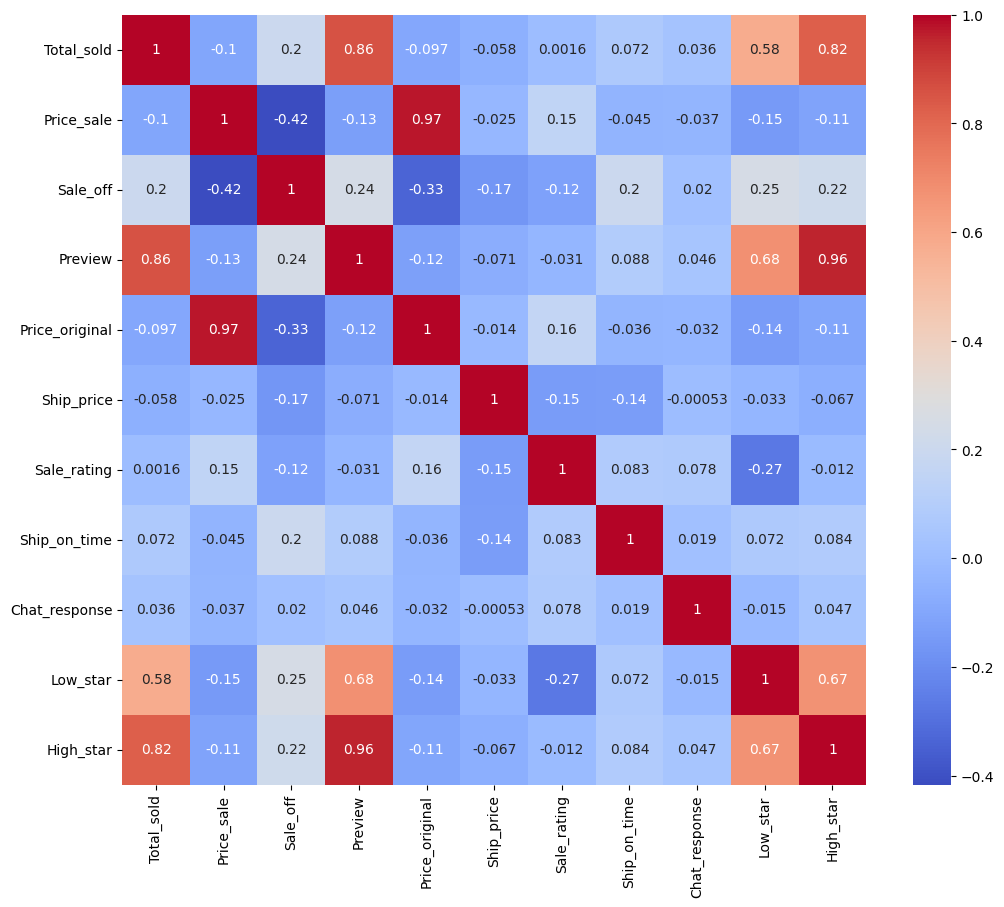

In [27]:
#Vẽ biểu đồ heatmap
from matplotlib import pyplot as plt
import seaborn as sns

#Đưa Total_sold lên đầu
cols = list(data.columns)
cols.insert(0, cols.pop(cols.index('Total_sold')))
data_temp = data[cols]

plt.figure(figsize=(12, 10))
sns.heatmap(data_temp.corr(), annot=True, cmap='coolwarm')
plt.show()

* Based on heatmap:

    - Columns: Ship_price, Sale_rating, Ship_on_time, Chat_Response hava a **very low** correlation with Total_sold and nearly 0. So we will drop them.

    - Colums: Price_sale, Sale_off, Price_original have a **low** correlation with Total_sold. 

    - Columns: Preview and Stars have a **very high** correlation with Total_sold.

    - Price_sale and Price_original have a very high correlation -> drop: price_original.


In [68]:
data = data.drop(columns=['Ship_price','Sale_rating', 'Ship_on_time', 'Chat_response', 'Price_original'], axis=1)

**Category Features**

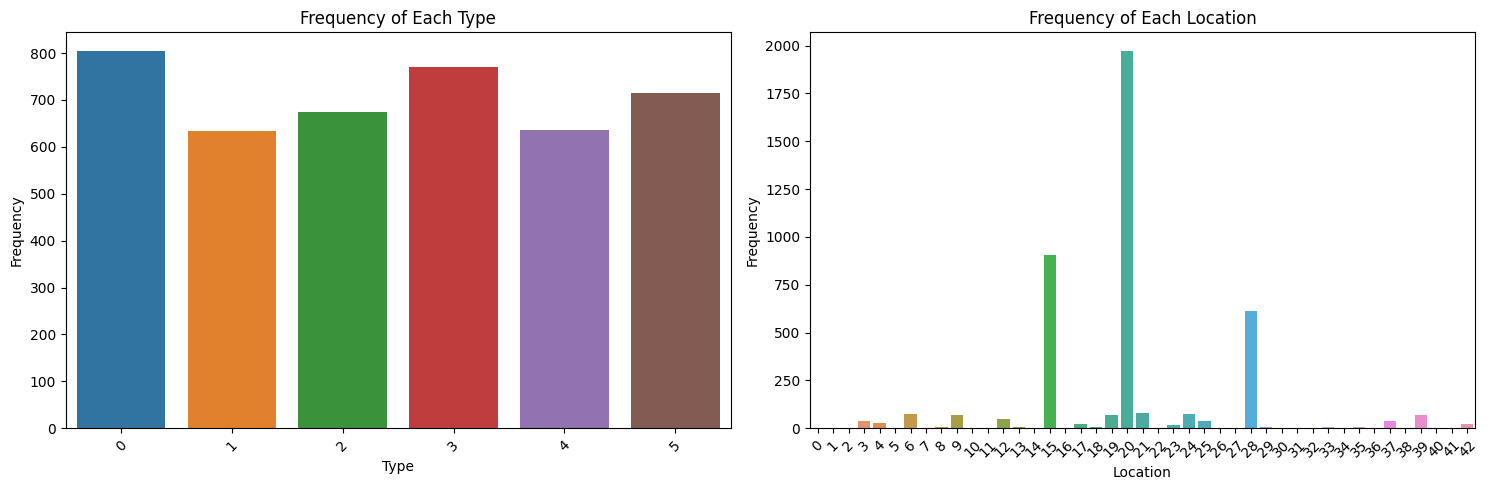

In [29]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for 'Type'
sns.countplot(ax=axes[0], x='Type', data=data)
axes[0].set_title('Frequency of Each Type')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot for 'Location'
sns.countplot(ax=axes[1], x='Location', data=data)
axes[1].set_title('Frequency of Each Location')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In Location feature, some categories has predominant others. This feature may not be relevant for our predictive model. So we will drop it.

In [69]:
data = data.drop(columns=['Location'], axis=1)

In [31]:
#Vẽ bar chart cho Total_sold theo Type
import plotly.express as px

sum_total = data_copy.groupby('Type')['Total_sold'].sum().reset_index()

# Vẽ biểu đồ histogram sử dụng Plotly Express
fig = px.bar(sum_total, x='Type', y='Total_sold', 
             title='Total Sold Products by Type',
             labels={'Total_sold': 'Total Sold', 'Type': 'Product Type'})

# Chỉnh lại kích thước của biểu đồ
fig.update_layout(
    width=700,
    height=500
)

# Hiển thị biểu đồ
fig.show()

* Dựa vào histogram: mặt hàng điện thoại, tivi, laptop được bán ít hơn so với mặt hàng quần áo, trang sức, giày dép.

In [32]:
#Histogram Price_sale
#Tạo biểu đồ histogram với Plotly
fig = px.histogram(data, x='Price_sale', nbins=10, title='Histogram of Price Sale')

# Điều chỉnh kích thước biểu đồ
fig.update_layout(
    width=800,  
    height=500  
)
fig.show()

* Giá trị của Price_sale phần lớn tập trung khoảng dưới 5 triệu và tần suất giảm mạnh khi giá tăng lên.

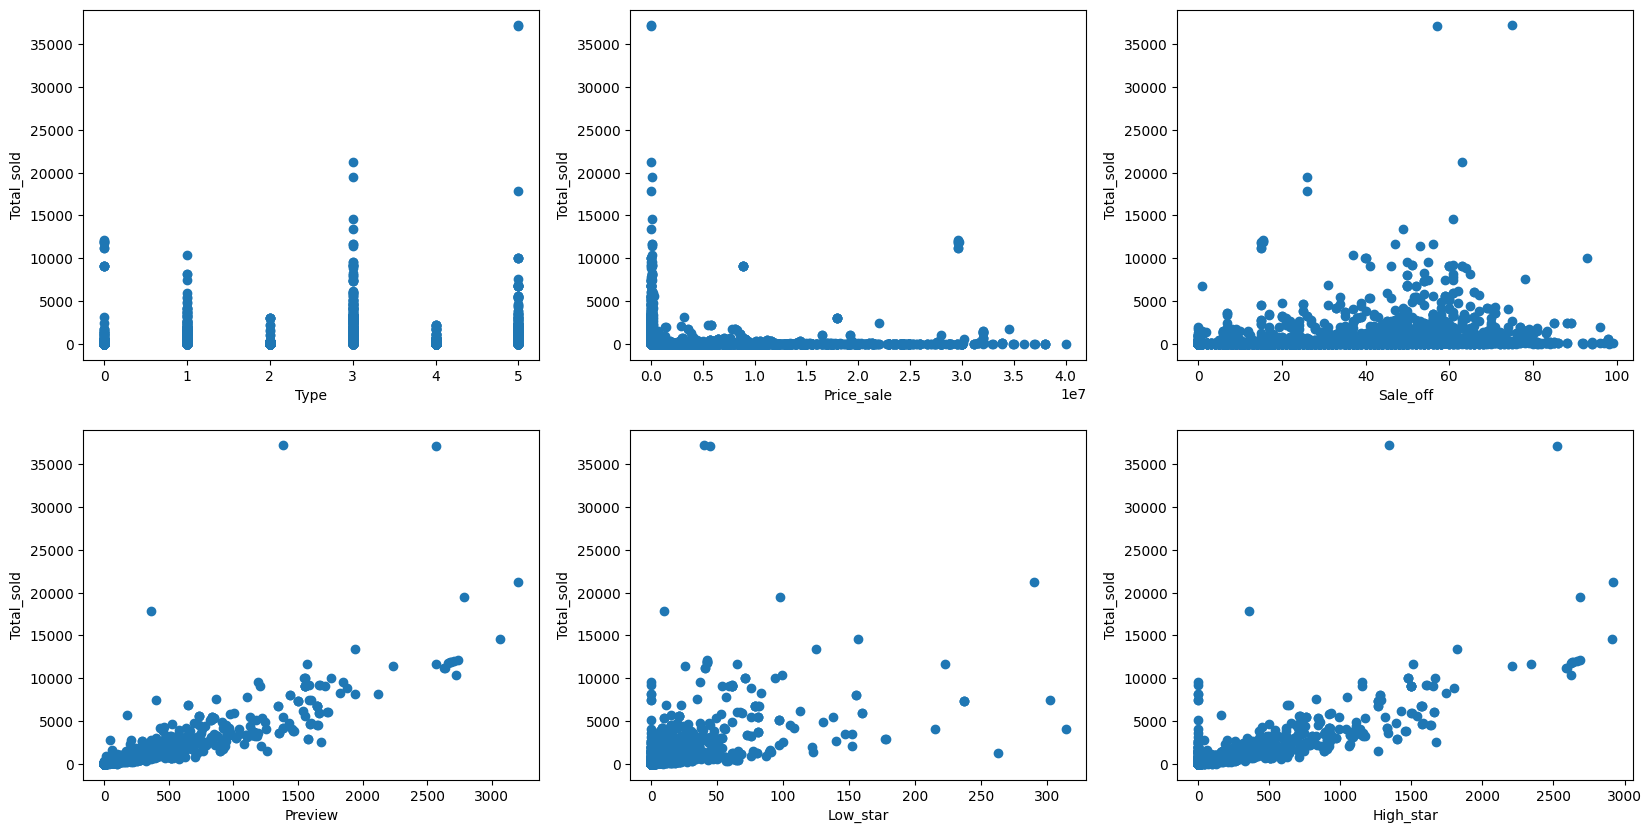

In [33]:
#Các cột cần vẽ scatter với Total_sold
columns = [col for col in data.columns if col != 'Total_sold']

#Tạo một figure với kích thước phù hợp
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

#Chuyển đổi axes thành mảng 1 chiều để dễ truy cập
axes = axes.flatten()

#Vẽ biểu đồ scatter
for i, column in enumerate(columns):
    axes[i].scatter(data[column], data['Total_sold'])
    axes[i].set_ylabel('Total_sold')
    axes[i].set_xlabel(column)

plt.show()

- **Total_sold & Price_sale**: phân tán dày ở giá trị thấp. Điều này thể hiện khi giá càng cao, số lượng bán ra càng giảm.

- **Total_sold & Sale_off**: số lượng bán ra cao khi có giảm giá, nhưng mối quan hệ không hoàn toàn tuyến tính.

- **Total_sold & Preview**: khi số lượng preview tăng, tổng số lượt bán cũng tăng.

- **Total_sold & Low_star**: mối quan hệ không rõ ràng, có thể có các sản phẩm bán ra cao nhưng vẫn nhận nhiều đánh giá thấp.

- **Total_sold & High_star**: mối quan hệ tuyến tính rõ ràng, khi số đánh giá cao tăng thì tổng số bán ra cũng tăng.

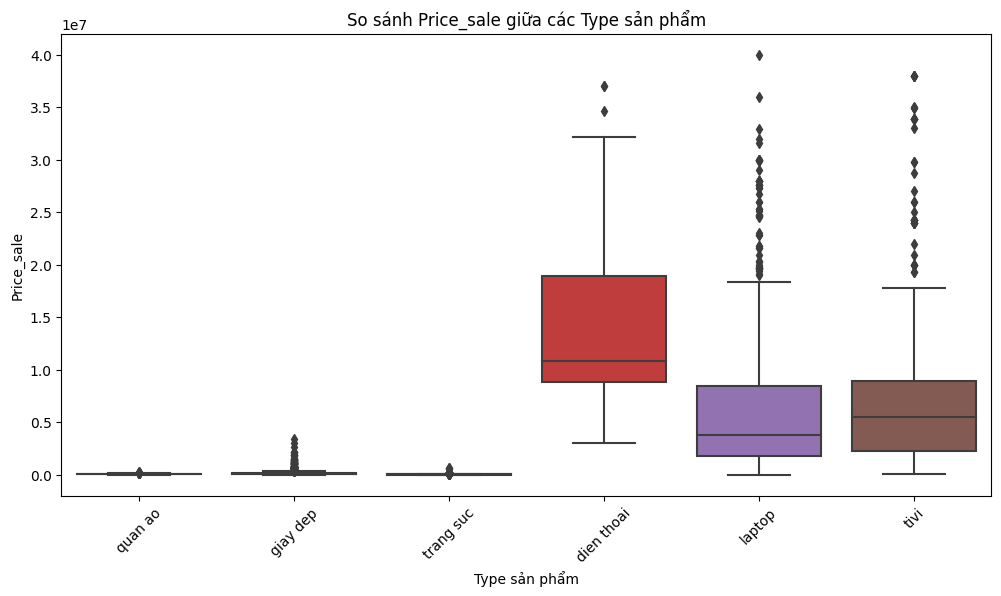

In [34]:
# Vẽ Box Plot: so sánh Price_sale giữa các loại sản phẩm với nhau (type)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Price_sale', data=data_copy)
plt.title('So sánh Price_sale giữa các Type sản phẩm')
plt.xlabel('Type sản phẩm')
plt.ylabel('Price_sale')
plt.xticks(rotation=45)
plt.show()


* Nhìn chung giá bán của điện thoại, tivi, laptop cao hơn và biến động nhiều hơn so với trang sức, quần áo, giày dép.


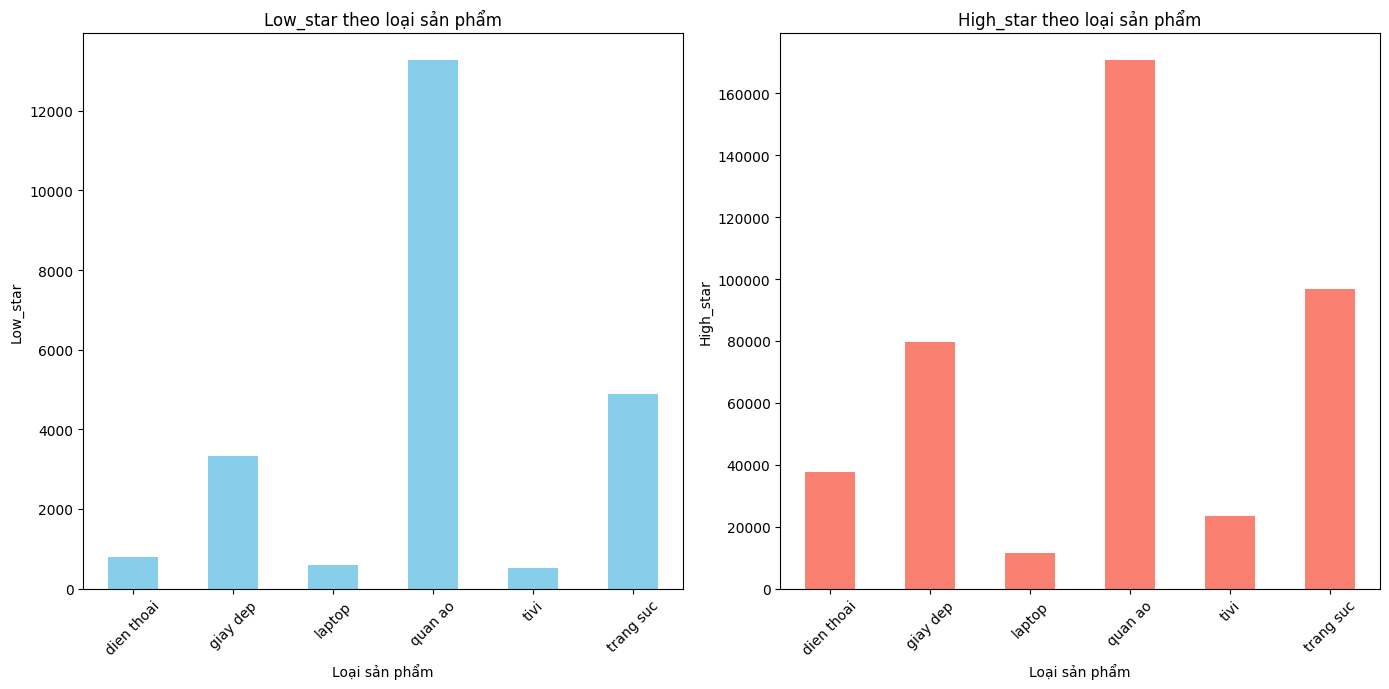

In [35]:
# Tính tổng số sao thấp và cao theo loại sản phẩm
total_low_star_by_type = data_copy.groupby('Type')['Low_star'].sum()
total_high_star_by_type = data_copy.groupby('Type')['High_star'].sum()

# Tạo biểu đồ thanh
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
total_low_star_by_type.plot(kind='bar', color='skyblue')
plt.title('Low_star theo loại sản phẩm')
plt.xlabel('Loại sản phẩm')
plt.ylabel('Low_star')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
total_high_star_by_type.plot(kind='bar', color='salmon')
plt.title('High_star theo loại sản phẩm')
plt.xlabel('Loại sản phẩm')
plt.ylabel('High_star')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Quần áo nhận được đánh giá high_star và low_star nhiều nhất.

- Giày dép và trang sức nằm ở mức vừa.

- Điện thoại, laptop, tivi có số lượng đánh giá ít hơn.

#### 3.4 Draw Causal Graph and Scaling numerical features

Determine the relationships between the independent variables: use **causal graph**

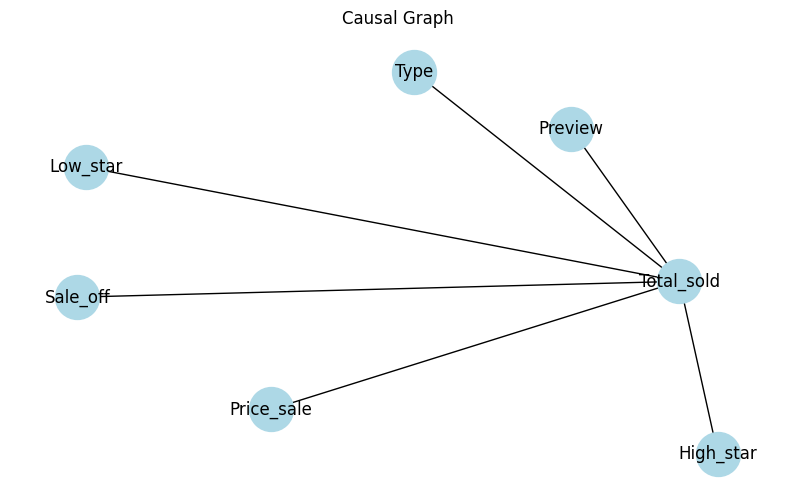

In [36]:
#Vẽ đồ thị nhân quả
import networkx as nx 

#Giả sử tất cả các biến độc lập có ảnh hưởng đến Total_sold
causal_graph = nx.DiGraph()
causal_graph.add_edges_from([
    ('Type', 'Total_sold'),
    ('Price_sale', 'Total_sold'),
    ('Sale_off', 'Total_sold'),
    ('Preview', 'Total_sold'),
    ('Low_star', 'Total_sold'),
    ('High_star', 'Total_sold')
])

plt.figure(figsize=(10,6))

pos = nx.spring_layout(causal_graph, seed=42)           #Thiết lập layout của đồ thị
nx.draw_networkx_nodes(causal_graph, pos, node_size=1000, node_color='lightblue')          #Vẽ các nút
nx.draw_networkx_edges(causal_graph, pos, arrows=True)                                     #Vẽ các cạnh
nx.draw_networkx_labels(causal_graph, pos, font_size=12, font_family='sans-serif', font_color='black')    #Vẽ nhãn của các nút
plt.title('Causal Graph')
plt.axis('off')
plt.show()

Scaling numerical features

In [70]:
#Split data into features (X) and the target variable (Y): Total_sold
X = data.drop(columns=['Total_sold'])
y = data['Total_sold']

#Scale X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#Convert data to dataframe
col = X.columns
X_std = pd.DataFrame(X_sc, columns=col)

#### 3.5 **Causal inference method**: using model

In [71]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.8, test_size=0.2, random_state=101)

In [72]:
#MAE, MSE and Score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def adjusted_r2_score(y_true, y_pred, r2):
    n = len(y_true)
    k = X_test.shape[1]  
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    return adjusted_r2

#Tạo hàm evaluate model: MSE, MAE, R2, Adjusted R2
def model_evaluate(y_train, y_train_pred, y_test, y_test_pred):
    # Đánh giá hiệu suất mô hình trên dữ liệu huấn luyện
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_adjusted_r2 = adjusted_r2_score(y_train, y_train_pred, train_r2)
    evl_train = [train_mse, train_mae, train_r2, train_adjusted_r2]

    # Đánh giá hiệu suất mô hình trên dữ liệu kiểm tra
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_adjusted_r2 = adjusted_r2_score(y_test, y_test_pred, test_r2)
    evl_test = [test_mse, test_mae, test_r2, test_adjusted_r2]

    evl = pd.DataFrame([evl_train, evl_test], index=['Train', 'Test'], columns=['MSE', 'MAE', 'R2-Score', 'Adjusted R2-Score']).T
    evl = evl.round(3)
    return evl

In [73]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

##### 3.5.a **Linear regression**

In [149]:
from sklearn.linear_model import LinearRegression

model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

train_pred_rg = model_regression.predict(X_train)
test_pred_rg = model_regression.predict(X_test)

In [150]:
eval_lr = model_evaluate(y_train, train_pred_rg, y_test, test_pred_rg)
eval_lr

,Train,Test
MSE,583614.216,1007046.053
MAE,180.743,200.196
R2-Score,0.734,0.726
Adjusted R2-Score,0.734,0.725


- MSE: train << test, chênh lệch giữa train và test cho thấy mô hình đang overfitting -> Do nhiều dữ liệu nhiễu gây ra .

- MAE: chênh lệch nhỏ giữa train và test cho thấy model có độ chính xác trung bình tương đối ổn định, nhưng có một số outlier làm tăng MSE.

- R2 Score: của cả 2 tập train và test đều cao, đều gần 0.75 cho thấy mô hình có khả năng giải thích tốt biến thiên của dữ liệu và hoạt động ổn định trên cả 2 tập.

##### 3.5.b **Decision Tree Regression**

In [151]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

train_pred_dt = model.predict(X_train)
test_pred_dt = model.predict(X_test)

In [152]:
eval_dt = model_evaluate(y_train, train_pred_dt, y_test, test_pred_dt)
eval_dt

,Train,Test
MSE,2.942,1038542.918
MAE,0.151,152.415
R2-Score,1.000,0.718
Adjusted R2-Score,1.000,0.716


- MSE: Dự đoán của mô hình có xu hướng rất chính xác tuyệt đối với tập train vì giá trị MSE trên tập train thấp. Nhưng với tập test thì ngược lại.

- MAE: Tương tự như MSE, sai số tuyệt đối trên tập train thấp nhưng với tập test thì ngược lại.

- R2 Score: trên tập huấn luyện là cực cao xấp xỉ 1 (gần như tuyệt đối), nhưng trên tập kiểm tra thấp đạt gần 0.72. Điều này cho thấy mô hình học hết các đặc trưng của tập train và khi dữ liệu mới vào thì không thể hiện được hiệu quả.

=> Mô hình bị overfitting. Điều này có nghĩa là mô hình hoạt động cực kỳ tốt trên dữ liệu huấn luyện nhưng không thể tổng quát hóa cho dữ liệu kiểm tra. Đây là do sự chênh lệch lớn giữa hiệu suất trên tập huấn luyện và tập kiểm tra.

Điều chỉnh tham số để cải thiện overfitting: **Hyperparameter Tuning**

In [49]:
# Define the hyperparameters and their values
params_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 3, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'absolute_error'],
    'random_state': [101],
}

In [50]:
# Create the GridSearchCV object
grid_search_dt = GridSearchCV(estimator=model, param_grid=params_dt, cv=5, scoring='r2', n_jobs=-1)

In [51]:
# Fit the model
grid_search_dt.fit(X_std, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'random_state': [101]},
             scoring='r2')

In [52]:
# Print the best parameters and best score
print("Best Parameters: ", grid_search_dt.best_params_)
print("Best Score: ", grid_search_dt.best_score_)

Best Parameters:  {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 101}
Best Score:  0.7794359780038893


Score của model sau khi hyperparameter tuning là 0.779, cho thấy model đã được cải thiện, giảm overfitting và phản ánh chính xác hơn hiệu suất dự đoán trên dữ liệu kiểm thử.

##### 3.5.c **Random Forest Regression**

Đây là mô hình có thuật toán tương tự phương pháp Bagging trong Ensemble Language và được xây dựng dựa trên cơ sở của Decision Tree

In [153]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()

rf_regressor.fit(X_train, y_train)

train_pred_rf = rf_regressor.predict(X_train)
test_pred_rf =rf_regressor.predict(X_test)

In [154]:
eval_rf = model_evaluate(y_train, train_pred_rf, y_test, test_pred_rf)
eval_rf

,Train,Test
MSE,54718.782,814428.614
MAE,42.371,139.433
R2-Score,0.975,0.779
Adjusted R2-Score,0.975,0.777


- MSE: Giá trị của cả 2 tập train và test chênh nhau quá nhiều (tập test gấp 10 lần tập train). Điều này cho thấy rằng mô hình hoạt động rất tốt trên tập train nhưng không đạt được hiệu suất trên tập test.

- MAE: tương tự như MSE. MAE cao hơn trên tập test cũng chỉ ra rằng dự đoán trên tập test kém chính xác hơn so với tập train.

- R2 Score: đạt được trên tập huấn luyện là cao, nhưng trên tập kiểm tra lại thấp.

=> Mô hình bị overfitting, do sự chênh lệch lớn giữa hiệu suất trên tập huấn luyện và tập kiểm tra.

**Hyperparameter Tuning**

In [55]:
# Define the hyperparameters and their values
param_rfr = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': [None, 'sqrt', 'log2'],
    'oob_score': [False, True],
    'n_jobs' : [-1],
    'max_samples': [0.8, 0.9, 1],
    'random_state': [101],
}

In [57]:
grid_search_rfr = GridSearchCV(estimator=rf_regressor, param_grid=param_rfr, cv=5, scoring='r2', n_jobs=-1)

In [58]:
grid_search_rfr.fit(X_std, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_samples': [0.8, 0.9, 1],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'n_jobs': [-1], 'oob_score': [False, True],
                         'random_state': [101]},
             scoring='r2')

In [59]:
# Print the best parameters and best score
print("Best Parameters: ", grid_search_rfr.best_params_)
print("Best Score: ", grid_search_rfr.best_score_)

Best Parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'max_samples': 0.9, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 101}
Best Score:  0.7707207598715478


Score của model sau khi hyperparameter tuning là 0.7707, cho thấy model đã được cải thiện, giảm overfitting và phản ánh chính xác hơn hiệu suất dự đoán trên dữ liệu kiểm thử.

##### 3.5.d **Gradient Boosting**


Đây là phương pháp thuộc phương pháp Boosting của Ensemble Language.

In [155]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()

gb_regressor.fit(X_train, y_train)

train_pred_gb = gb_regressor.predict(X_train)
test_pred_gb = gb_regressor.predict(X_test)

In [156]:
eval_gb = model_evaluate(y_train, train_pred_gb, y_test, test_pred_gb)
eval_gb

,Train,Test
MSE,51520.187,861331.159
MAE,79.936,152.665
R2-Score,0.977,0.766
Adjusted R2-Score,0.976,0.764


- MSE: Dự đoán của mô hình có xu hướng không chính xác đối với tập huấn luyện và tập kiểm tra vì giá trị MSE trên tập huấn luyện và kiểm tra đều cao.

- MAE: Giá trị trên tập huấn luyện < tập kiểm tra , điều này cho thấy mô hình có xu hướng dự đoán không chính xác và sai số lớn.

- R2 Score trên tập huấn luyện là rất cao (gần 0.98), nhưng trên tập kiểm tra thấp hơn đáng kể (gần 0.76). Điều này cho thấy mô hình có sự sai khác lớn giữa hiệu suất trên tập huấn luyện và tập kiểm tra.

=> Mô hình hiện tại bị overfitting, do sự chênh lệch lớn giữa hiệu suất trên tập huấn luyện và tập kiểm tra.

**Hyperparameter Tuning**

In [158]:
param_gb = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.8, 0.9, 1],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [101],
}

In [159]:
grid_search_gb = GridSearchCV(estimator=gb_regressor, param_grid=param_gb, cv=5, scoring='r2', n_jobs=-1)

In [160]:
grid_search_gb.fit(X_std, y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [100, 300, 500, 700, 1000],
                         'random_state': [101], 'subsample': [0.8, 0.9, 1]},
             scoring='r2')

In [161]:
# Print the best parameters and best score
print("Best Parameters: ", grid_search_gb.best_params_)
print("Best Score: ", grid_search_gb.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 101, 'subsample': 0.8}
Best Score:  0.790426922295902


Score của model sau khi hyperparameter tuning là 0.7904, cho thấy model đã được cải thiện, giảm overfitting và phản ánh chính xác hơn hiệu suất dự đoán trên dữ liệu kiểm thử.

##### 3.5.e **Conclusion**

- Để xác định model nào hoạt động tốt nhất, chúng ta sẽ xem xét các chỉ số chính như: MSE, MAE, R²-Score, và Adjusted R²-Score trên tập test:
    * MSE: Giá trị càng thấp càng tốt.
    * MAE: Giá trị càng thấp càng tốt.
    * R²-Score: Giá trị càng cao càng tốt.
    * Adjusted R²-Score: Giá trị càng cao càng tốt.



- Dựa vào các kết quả ở trên:
    * Trước khi tuning: Random Forest có hiệu quả cao và độ chính xác tốt nhất, Gradient Boosting cũng là một lựa chọn tốt, nhưng không hiệu quả bằng Random Forest. Linear Regression và Decision Tree có hiệu suất tương đương nhưng kém hơn đáng kể.
    
    * Sau khi tuning: Mô hình Gradient Boosting có hiệu suất tốt nhất với Best Score là 0.790.

- **KIỂM ĐỊNH GIẢ THUYẾT**

    1. Kiểm tra kết quả: Xác định độ tin cậy của kết quả thông qua các chỉ số như P-value, Confidence Interval.

    2. Đánh giá độ tin cậy: dựa trên kết quả, xác định các biến độc lập ảnh hưởng đáng kể đến **Total_sold**

In [75]:
#Phân tích hệ số hồi quy
import statsmodels.api as sm
from tabulate import tabulate

#Đặt lại chỉ số để đảm bảo căn chỉnh chính xác
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#Thêm hằng số cho mô hình
X_train_sm = sm.add_constant(X_train)  
ols_model = sm.OLS(y_train, X_train_sm).fit()

#Chuyển đổi summary thành DataFrame
summary = ols_model.summary2().tables[1]

#Hiển thị kết quả dưới dạng bảng 
print(tabulate(summary.round(3), headers='keys', tablefmt='psql'))

+------------+----------+------------+--------+---------+----------+----------+
|            |    Coef. |   Std.Err. |      t |   P>|t| |   [0.025 |   0.975] |
|------------+----------+------------+--------+---------+----------+----------|
| const      |  464.767 |     13.143 | 35.362 |   0     |  438.997 |  490.536 |
| Type       |   58.664 |     14.658 |  4.002 |   0     |   29.924 |   87.404 |
| Price_sale |   37.104 |     15.31  |  2.424 |   0.015 |    7.086 |   67.122 |
| Sale_off   |  -15.181 |     14.964 | -1.014 |   0.31  |  -44.522 |   14.159 |
| Preview    | 1346.38  |     49.466 | 27.218 |   0     | 1249.4   | 1443.37  |
| Low_star   |   57.877 |     18.184 |  3.183 |   0.001 |   22.224 |   93.53  |
| High_star  | -101.151 |     48.987 | -2.065 |   0.039 | -197.198 |   -5.104 |
+------------+----------+------------+--------+---------+----------+----------+


- Giải thích các cột:

    * **Coef. (Coefficient)**: hệ số hồi quy của từng biến độc lập.

    * **Std.Err.(Standard Error)**: sai số chuẩn của hệ số hồi quy.

    * **t**: giá trị t tính từ hệ số hồi quy và sai số chuẩn, dùng để kiểm định ý nghĩa thống kê của hệ số hồi quy.

    * **P>|t|**: P-value nhỏ hơn mức ý nghĩa (thường là 0.05) cho thấy hệ số hồi quy có ý nghĩa thống kê.
    
    * **[0.025, 0.975]**: khoảng tin cậy 95% của hệ số hồi quy.

- **Tổng kết**: 

    * Biến có ý nghĩa thống kê cao (P-value < 0.05): Type, Preview, Price_sale, Preview, Low_star, High_star. -> Các biến này có ảnh hưởng đáng kể đến Total_sold.

    * Biến không có ý nghĩa thống kê: Sale_off. Biến này không có ảnh hưởng đáng kể đến Total_sold.

=> Bác bỏ giả thuyết: tỷ lệ giảm giá tác động trực tiếp đến tổng số lượt bán ra của sản phẩm trên Lazada.

**Vậy tổng số lượng bán ra của từng sản phẩm không bị ảnh hưởng bởi tỷ lệ giảm giá mà bị ảnh hưởng bởi loại sản phẩm, số lượt đánh giá, giá bán và số sao của sản phẩm đó.**